In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset=pd.read_csv("/content/drive/My Drive/DataSet/winequality-red.csv",sep=";")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
target=dataset["quality"]
dataset=pd.DataFrame(sc.fit_transform(dataset.drop("quality",axis=1)) , columns=dataset.columns[:-1] )
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,accuracy_score
features=dataset
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=42)
model=SVR(kernel='rbf',)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_test.shape , y_pred.shape)
print("accuracy --> " , model.score(x_test,y_test) )
print("MSE ---> ",mean_squared_error(y_test,y_pred) )


(320,) (320,)
accuracy -->  0.4619680927656491
MSE --->  0.3516070039083548


In [6]:
## Tuning HyperParams -->
from sklearn.model_selection import KFold,GridSearchCV
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
hyper_params={"kernel":["rbf"],
              "C":[1.0,10,100,1000],
              "gamma":["auto","scale"]}
model_cv=GridSearchCV(estimator=model,param_grid=hyper_params,verbose=True,cv=kfold)
model_cv.fit(x_train,y_train)              


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.9min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10, 100, 1000], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

The Score -->  0.3707214343531331
Best Params -->  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


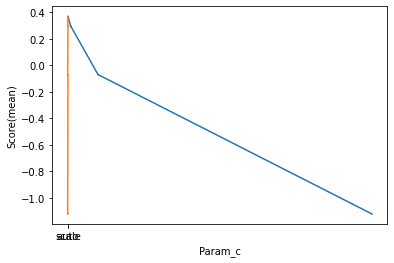

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [17]:
print("The Score --> ",model_cv.best_score_)
print("Best Params --> ",model_cv.best_params_)
cv_data=pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_data["param_C"],cv_data["mean_test_score"])
plt.plot(cv_data["param_gamma"],cv_data["mean_test_score"])
plt.xlabel("Param_c");plt.ylabel("Score(mean)")
plt.legend()
plt.show()
cv_data.columns